In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [8]:
e          = 1.602e-19              # 1 eV = 1.602e-19 J
ħ          = 0.6582119514           # [eV fs]
c          = 299792458              # [m/s]
massfactor = e/c/c                  # 1 eV/c^2 = 1.79e-36 kg
me         = 9.109e-31/massfactor   # [eV/c^2] = 0.5x10^6 eV/c^2   
c_nmfs     = 299.792458             # [nm/fs]
Eλ         = ħ*ħ*c_nmfs*c_nmfs/2/me # eV nm^2

# Number of points in the mesh
N    = 2**12+1
xinf = 100.0             # nm
ℓ    = 1.0               # nm
α    = 1.0

x    = linspace(-xinf,xinf,N)
Δx   = x[1]-x[0]

V0   = 2.0              # eV

V        = α*x*x


Mdd      = 1./(Δx*Δx)*( diag(ones(N-1),-1) -2*diag(ones(N),0) + diag(ones(N-1),1))
H        = -Eλ*Mdd + diag(V)
E,ψT     = eigh(H)
ψ        = transpose(ψT)

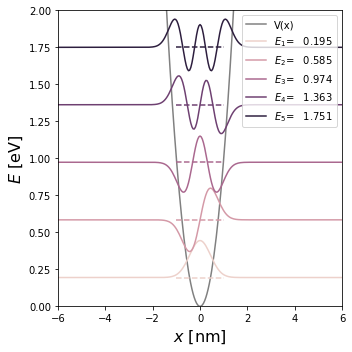

In [11]:
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

axes.set_xlim(-6*ℓ,6*ℓ)

axes.plot(x,V,c="Gray",label="V(x)")


index = E<V0
itera = [i for i, x in enumerate(index) if x]

num_shades = len(itera)
color_list = sns.cubehelix_palette(num_shades)

for i in itera:
    axes.plot(x,E[i]+ψ[i],label=r"$E_{0}$={1:>8.3f}".format(i+1,E[i]),c=color_list[i])

for i in itera:
    axes.plot([-ℓ,ℓ],[E[i],E[i]],'--',c=color_list[i])

axes.set_xlabel("$x$ [nm]",fontsize=16)
axes.set_ylabel("$E$ [eV]",fontsize=16)
axes.legend(loc=1)
axes.set_ylim(0,V0)
fig.tight_layout()
fig.savefig("Cap4_OsciladorArmonico.pdf")

In [ ]:
%pylab inline
import seaborn as sns
from ipywidgets import *

\begin{eqnarray}
E_n = \bigg( \frac{h^2}{8m}\bigg) \frac{1}{\ell^2} n^2
\end{eqnarray}

\begin{eqnarray}
\psi(x) = \sqrt{\frac{2}{\ell}} \sin\bigg( \frac{n\pi x}{\ell} \bigg)
\end{eqnarray}

In [3]:
π          = pi
# Physical quantities
e          = 1.602e-19
h          = 4.135667               # eV fs
c          = 299792458              # [m/s]
massfactor = e/c/c                  # 1 eV/c^2 = 1.79e-36 kg
me         = 9.109e-31/massfactor   # [eV/c^2] = 0.5x10^6 eV/c^2   
c_nmfs     = 299.792458             # [nm/fs]
Eλ         = h*h*c_nmfs*c_nmfs/8/me # eV nm^2

# Number of levels to show
nmax       = 5
n          = arange(nmax)+1

ℓ          = 1                      # nm

E          = Eλ/ℓ/ℓ*n*n

x          = linspace(0,ℓ,1000)
ψ          = array( [ sqrt(2/ℓ)*sin(nv*π*x/ℓ) for nv in n] )
ψ2         = ψ*ψ

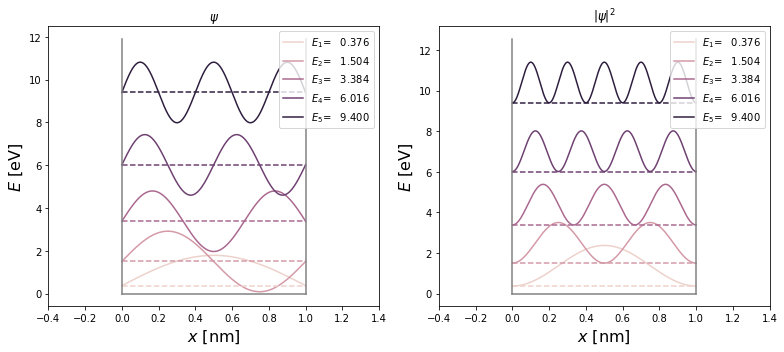

In [4]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(11,5))

axes[0].set_xlim(-.4*ℓ  ,1.4*ℓ)

color_list = sns.cubehelix_palette(nmax)

for i in arange(nmax):
    axes[0].plot(x,E[i]+ψ[i],label=r"$E_{0}$={1:>8.3f}".format(i+1,E[i]),c=color_list[i])

for i in arange(nmax):
    axes[0].plot([0 ,ℓ],[E[i],E[i]],'--',c=color_list[i])

    

axes[0].plot([0,0],[0,(ψ.max()+E[-1])*1.1],c="Gray")
axes[0].plot([ℓ,ℓ],[0,(ψ.max()+E[-1])*1.1],c="Gray")
axes[0].plot([0,ℓ],[0,0],c="Gray")

axes[0].set_xlabel("$x$ [nm]",fontsize=16)
axes[0].set_ylabel("$E$ [eV]",fontsize=16)
axes[0].legend(loc=1)
axes[0].set_title(r"$\psi$")

axes[1].set_xlim(-.4*ℓ  ,1.4*ℓ)

color_list = sns.cubehelix_palette(nmax)

for i in arange(nmax):
    axes[1].plot(x,E[i]+ψ2[i],label=r"$E_{0}$={1:>8.3f}".format(i+1,E[i]),c=color_list[i])

for i in arange(nmax):
    axes[1].plot([0 ,ℓ],[E[i],E[i]],'--',c=color_list[i])

    

axes[1].plot([0,0],[0,(ψ2.max()+E[-1])*1.1],c="Gray")
axes[1].plot([ℓ,ℓ],[0,(ψ2.max()+E[-1])*1.1],c="Gray")
axes[1].plot([0,ℓ],[0,0],c="Gray")

axes[1].set_xlabel("$x$ [nm]",fontsize=16)
axes[1].set_ylabel("$E$ [eV]",fontsize=16)
axes[1].legend(loc=1)
axes[1].set_title(r"$|\psi|^2$")


fig.tight_layout()
fig.savefig("Cap2_OneDimensionalBox.pdf")

## Evolución temporal

In [5]:
π          = pi
# Physical quantities
e          = 1.602e-19
h          = 4.135667               # eV fs
ħ          = h/2/π                  # eV fs
c          = 299792458              # [m/s]
massfactor = e/c/c                  # 1 eV/c^2 = 1.79e-36 kg
me         = 9.109e-31/massfactor   # [eV/c^2] = 0.5x10^6 eV/c^2   
c_nmfs     = 299.792458             # [nm/fs]
Eλ         = h*h*c_nmfs*c_nmfs/8/me # eV nm^2

# Number of levels to show
nmax       = 5
n          = arange(nmax)+1

ℓ          = 1                      # nm

E          = Eλ/ℓ/ℓ*n*n

x          = linspace(0,ℓ,1000)
ψ          = array( [ sqrt(2/ℓ)*sin(nv*π*x/ℓ) for nv in n] )

In [6]:
color_list = sns.cubehelix_palette(nmax)

In [7]:

@interact(t=(0,10,0.01))
def Evolution(t=0.0):
    fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(16,5))
    axes[0].set_xlim(-.4*ℓ  ,1.4*ℓ)
    axes[1].set_xlim(-.4*ℓ  ,1.4*ℓ)
    axes[2].set_xlim(-.4*ℓ  ,1.4*ℓ)
    
    axes[0].set_ylim(-2,2*nmax+2)
    axes[1].set_ylim(-2,2*nmax+2)
    axes[2].set_ylim(-2,2*nmax+2)
    

    
    for nv in n:
        
        i = nv - 1
        E  = Eλ/ℓ/ℓ*nv*nv
        Ψe = exp(-1.J*E*t/ħ)*sqrt(2/ℓ)*sin(nv*π*x/ℓ)
        Ψe2 = conjugate(Ψe)*Ψe
        
        axes[0].plot(x,E+Ψe.real,label=r"$E_{0}$={1:>8.3f}".format(i+1,E),c=color_list[i])
        axes[0].plot([0 ,ℓ],[E,E],'--',c=color_list[i])
        
        axes[1].plot(x,E+Ψe.imag,label=r"$E_{0}$={1:>8.3f}".format(i+1,E),c=color_list[i])
        axes[1].plot([0 ,ℓ],[E,E],'--',c=color_list[i])
        
        axes[2].plot(x,E+Ψe2.real,label=r"$E_{0}$={1:>8.3f}".format(i+1,E),c=color_list[i])
        axes[2].plot([0 ,ℓ],[E,E],'--',c=color_list[i])
        
    axes[0].plot([0,0],[0,2*nmax+2],c="Gray")
    axes[0].plot([ℓ,ℓ],[0,2*nmax+2],c="Gray")
    axes[0].plot([0,ℓ],[0,0],c="Gray")
    
    axes[0].set_xlabel("$x$ [nm]",fontsize=16)
    axes[0].set_ylabel("$E$ [eV]",fontsize=16)
    axes[0].legend(loc=1)
    axes[0].set_title(r"Re $(\psi)$")
    
    axes[1].plot([0,0],[0,2*nmax+2],c="Gray")
    axes[1].plot([ℓ,ℓ],[0,2*nmax+2],c="Gray")
    axes[1].plot([0,ℓ],[0,0],c="Gray")
    
    axes[1].set_xlabel("$x$ [nm]",fontsize=16)
    axes[1].set_ylabel("$E$ [eV]",fontsize=16)
    axes[1].legend(loc=1)
    axes[1].set_title(r"Im $(\psi)$")
    
    axes[2].plot([0,0],[0,2*nmax+2],c="Gray")
    axes[2].plot([ℓ,ℓ],[0,2*nmax+2],c="Gray")
    axes[2].plot([0,ℓ],[0,0],c="Gray")
    
    axes[2].set_xlabel("$x$ [nm]",fontsize=16)
    axes[2].set_ylabel("$E$ [eV]",fontsize=16)
    axes[2].legend(loc=1)
    axes[2].set_title(r"$|\psi|^2$")
    return
        

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Output()), _dom_classes=('…